In [2]:
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy.random as npr
import scipy.stats as stats
from math import pi,log,sqrt
import seaborn as sns
from sklearn import datasets

Les données "wine" représentent la concentration des vins en différentes composoantes. On commence par charger les données

In [28]:
wine = datasets.load_wine()
X=wine.data
y=wine.target
data = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
data['target'] = pd.Categorical(wine['target']) #transformation en facteur
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [29]:
print(data.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

L'objectif est de voir s'il existe des différences significatives entre les groupes 0,1 ou 2 (en el variable target) en terme de concentration d'alcool. On réalise donc une anova a un facteur.

p-value = 3.319503795619638e-36


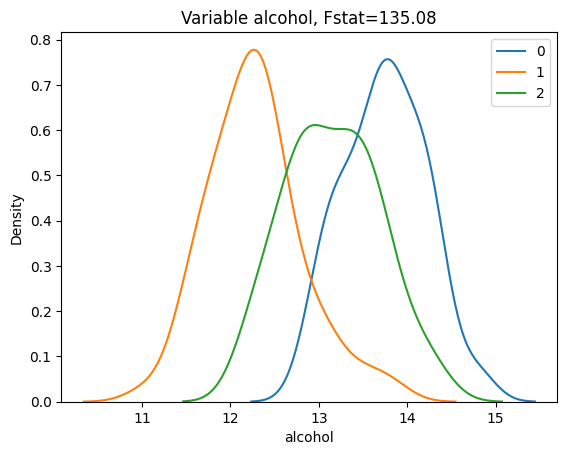

In [42]:
L = 'alcohol'

#Calcul de la F statistique et de la p-value pour l'ANOVA à un facteur
F, p = stats.f_oneway(data[L][data.target == 0], 
                      data[L][data.target == 1], 
                      data[L][data.target == 2])

# Traçage des distributions
for i in data.target.unique():
    sns.kdeplot(data[L][data.target == i], 
                label='{}'.format(i))

# Rprésentation
plt.legend()
plt.title('Variable {}, Fstat={}'.format(L, round(F, 2)))
print(f"p-value = {p}")
plt.show()

La F-statistique de l'ANOVA est de 135.08 et la p-value est << 0.05. Il existe donc des différences significatives de moyenne entre les moyennes des 3 groupes (au seuil de 5%)
On crée des échantillons de test et d'apprentissage avec des proportions respectives de 1/3 et 2/3

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)
y_test

array([1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1,
       1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1])

La représentation des données en fonction des classes nous amène à la construction d'un modèle LDA

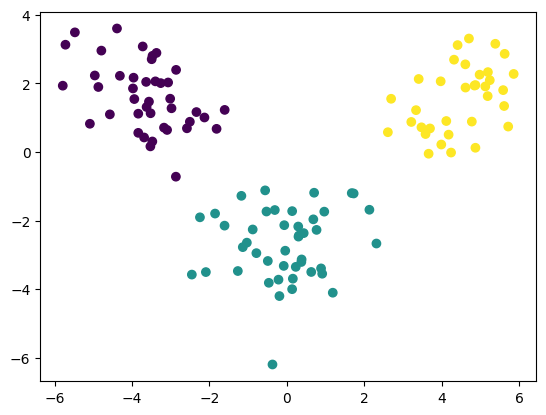

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train) #ajustement du modèle
LD1=lda.transform(X_train) # création des LD avec le modèle
plt.scatter(LD1[:,0],LD1[:,1],c=y_train) #stripchart

On voit bien qu'il existe une discrimination linéaire possible entre les groupes, nous entrainons notre modèle et analysons ses performances

In [26]:
y_pred=lda.predict(X_test)
print(confusion_matrix(y_pred,y_test))
lda.score(X_test,y_test)

[[18  1  0]
 [ 0 25  0]
 [ 0  1 14]]


0.9661016949152542

Notre modèle possède une très bonne précision (96,6%).